# Data Mining – Discrétisation


---

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 

import warnings

from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import KBinsDiscretizer
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from feature_engine import discretisers as dsc

warnings.simplefilter("ignore", DeprecationWarning)

In [127]:
df = pd.read_csv("FINAL_DATA.csv", index_col=0)

In [128]:
df.head(2)

,url,shares,content,author_name,title,nb_images,num_videos,num_hrefs,num_keywords,chanel,...,Topic_lda Telecomunication devices,Topic_lda Entertainment,dominant_topic_lda,content_polarity,abs_content_polarity,content_subjectivity,title_polarity,abs_title_polarity,title_subjectivity,lemmatized
0,http://mashable.com/2013/01/07/ap-samsung-spon...,711,The Associated Press is the latest news organ...,Seth Fiegerman,AP's Twitter to Begin Displaying Sponsored Tweets,1,0.0,3.0,4.0,Business,...,0.025,0.024,Internet and social media,0.148948,0.148948,0.341246,0.0,0.0,0.0,"['the associated press', 'late', 'news', 'orga..."
1,http://mashable.com/2013/01/07/apple-40-billio...,1500,It looks like 2012 was a pretty good year for...,Seth Fiegerman,Apple's App Store Passes 40 Billion Downloads,1,0.0,3.0,6.0,Business,...,0.855,0.033,Telecomunication devices,0.323333,0.323333,0.702222,0.0,0.0,0.0,"['look', 'like', 'a pretty good year', 'apple'..."


## En quoi consiste la discrétisation ?

La discrétisation est une méthode de transformation d’une variable quantitative en une variable qualitative. Autrement dit, c’est le fait de réaliser un découpage en classes. Cette méthode possède plusieurs avantages :

> Certaines techniques statistiques ne fonctionnent que sur des variables qualitatives (notamment les classifieurs).

> Minimiser l’impact des valeurs extrêmes sur le modèle ;

> Faciliter l’interprétation des résultats.

Toutefois, si nous voulons utiliser une méthode de dicrétisation, la difficulté réside dans le fait de maintenir un bon équilibre concernant la perte d’information : doit-on garder un nombre faible de classes au risque de perdre trop d’informations, ou un nombre élevé de classes et ainsi réduire l’utilité de la discrétisation ?

Il faut noter que la meilleure discrétisation possible reste celle du métier. Toutefois, l'expertise du métier n'est pas toujours disponible. Pour pallier cela, on peut utiliser des méthodes statistiques guidée par les caractéristique des données.

On peut afficher la variable que nous souhaitons discrétiser sur un axe horizontal 

In [129]:
shares = df.shares

In [130]:
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

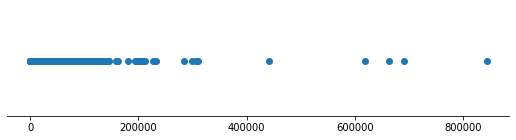

In [133]:
plt.figure(figsize=(9,2))
plt.scatter(shares, np.zeros(len(shares)), marker='o')
plt.yticks([])
plt.savefig('rapport/img_projet/shares.png');

## Les méthodes usuelles

Plusieurs méthodes de discrétisation existent. Ces dernières ont toutes leurs avantages et leurs inconvénients mais leurs choix dépendent de la nature des données. 

Il existe tout d'abord les méthodes usuelles :


- __Quantiles__ : il s’agit de diviser l’ensemble des données selon une répartition équivalente (même nombre d’individus par classe). L’avantage est de créer des classes homogènes. Cependant, cette méthode ne prend pas en compte la distribution des valeurs. Ainsi, des valeurs très différentes peuvent se retrouver dans la même classe ou encore des valeurs similaires peuvent se retrouver dans des classes différentes.

- __Étendue__ : il s’agit de diviser les données avec des bornes de mêmes amplitudes. Cette méthode facile à interpréter est souvent utilisé pour l’âge. En dehors de ce cas, elle est peu utilisée car elle ne convient pas si la distribution des valeurs est trop dissymétrique (les classes pourraient être très inégales).


Le grand problème de ces deux méthodes est le fait de choisir le nombre de classe. Car ces seuils ne tiennent pas compte de la proximité des valeurs.

### Le choix du nombre de classes 

In [134]:
IQ = np.quantile(shares,q=0.75) - np.quantile(shares,q=0.25)

In [135]:
dic = {}

dic["Brooks-Carruthers"] = int(5 * np.log10(len(shares)))
dic["Huntsberger"] = int(1 + 3.332 * np.log10(len(shares)))
dic["Sturges"] = int(np.log2(len(shares) + 1))
dic["Scott"] = int((max(shares) - min(shares)) / (3.5 * np.std(shares) * len(shares)**(-1/3)))
dic["Freedman-Diaconis"] = int((np.max(shares) - np.min(shares)) / (2 * IQ * len(shares)**(-1/3)))

In [139]:
pd.DataFrame.from_dict(dic, orient='index', columns=["Nombre de classes"])

,Nombre de classes
Brooks-Carruthers,22
Huntsberger,16
Sturges,15
Scott,722
Freedman-Diaconis,7673


D'après les différents indicateurs, on remarque que beaucoup de classes sont proposés pour discrétiser notre variable. Cette discrétisation ne répond pas trop à notre problématique et nous allons donc limiter notre choix entre un chiffre compris entre 2 et 4 classes.

### Quantiles

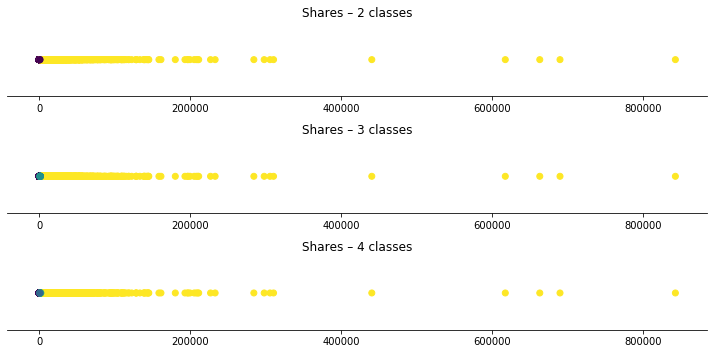

In [140]:
plt.figure(figsize=(10,5))

bins_quantiles = {}

for j,i in enumerate(range(2,5)):
    plt.subplot(3,1,j+1)
    test = KBinsDiscretizer(encode='ordinal',n_bins=i, strategy='quantile')
    kmean = test.fit_transform(shares.to_numpy().reshape(-1,1))
    plt.scatter(shares.to_numpy().reshape(-1,1), np.zeros(len(shares)), c=kmean)
    plt.yticks([])
    plt.title("Shares – {} classes".format(i))
    bins_quantiles[i] = test.bin_edges_[0][1:-1].astype(int);

plt.tight_layout(True)
plt.savefig('rapport/img_projet/quantiles.png');

In [11]:
pd.DataFrame.from_dict(bins_quantiles, orient='index')

,0,1,2
2,1400,NaN,NaN
3,1100,2100.0,NaN
4,946,1400.0,2800.0


**Commentaire** : Avec cette méthode, la discrétisation se fait un niveau de la médiane lorsqu'il y a deux classe. Celle-ci étant située à 1400, on observe graphiquement qu'une grande amplitude de valeur est comprise dans la seconde classe. Avec cette méthode, les deux classes auraient la même taille.

### Étendue

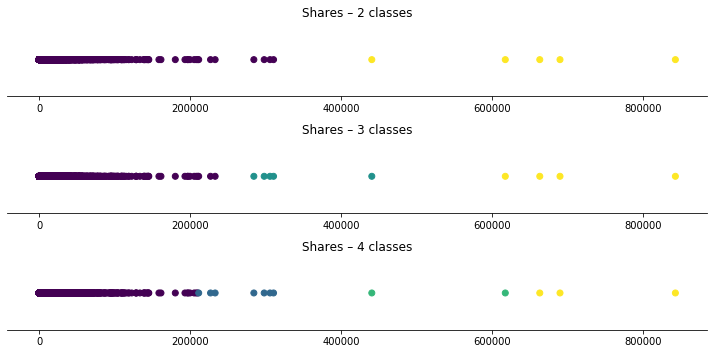

In [141]:
plt.figure(figsize=(10,5))

bins_etendue = {}

for j,i in enumerate(range(2,5)):
    plt.subplot(3,1,j+1)
    test = KBinsDiscretizer(encode='ordinal',n_bins=i, strategy='uniform')
    kmean = test.fit_transform(shares.to_numpy().reshape(-1,1))
    plt.scatter(shares.to_numpy().reshape(-1,1), np.zeros(len(shares)), c=kmean)
    plt.yticks([])
    plt.title("Shares – {} classes".format(i))
    bins_etendue[i] = test.bin_edges_[0][1:-1].astype(int);

plt.tight_layout(True)
plt.savefig('rapport/img_projet/etendue.png');

In [13]:
pd.DataFrame.from_dict(bins_etendue, orient='index')

,0,1,2
2,421652,NaN,NaN
3,281103,562201.0,NaN
4,210828,421652.0,632476.0


**Commentaire** : avec cette méthode, on ne prend en compte seulement les valeurs, toutefois, on peut remarquer qu'un article soit 400 000 fois ou 200 000, il reste tout de même populaire. Cette méthode n'est elle pas aussi très adaptée. Pour que la discrétisation soit de bonne qualité, il faudrait prendre en compte la dispersion des données.

## Méthodes par algorithmes : KMeans, Arbre de régression ou CAH

Il existe d'autre méthode qui tiennent compte de la dispersions des données. Les données peuvent être organisées en « paquets » plus ou moins homogènes. Le nombre de classe étant difficile à estimer, on s’intéresse donc aux caractéristiques de dispersion des données. On se limitera donc à une séparation binaire.


- __K-Means__ : il s’agit d’une méthode utilisant l’algorithme du K-Moyennes pour le partitionnement des données. On initialise un nombre de classes $k$ et ces dernières sont attribuées selon la classe la plus proche en termes de distance. Cette méthode est très dépendante de l’initialisation des clusters et aux valeurs extrêmes.

- __Classification Hiérarchique__ : La séparation des données se fait à partir d’un algo- rithme de classification hiérarchique (ascendant ou descendant). On commence par N classes, puis on regroupe les points dont le regroupement minimise un critère d’agrégation (méthode de Ward par exemple), et on recommence jusqu’à avoir une même classe pour toutes les données. La méthode de sélection se fait par la visuali- sation d’un dendrogramme.

- __Arbre de décision__ : il s’agit de séparer les données par un algorithme d’arbre de décision. À partir des branches de l’arbre on pourra choisir un nombre de classes optimales qui séparera au mieux les données selon la métrique choisie.

### KMean

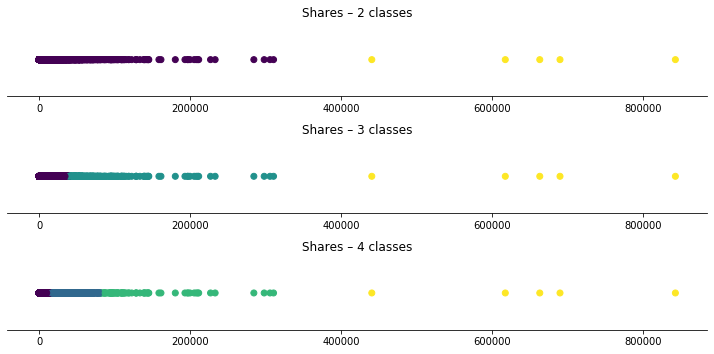

In [142]:
plt.figure(figsize=(10,5))

bins_kmean = {}

for j,i in enumerate(range(2,5)):
    plt.subplot(3,1,j+1)
    test = KBinsDiscretizer(encode='ordinal',n_bins=i, strategy='kmeans')
    kmean = test.fit_transform(shares.to_numpy().reshape(-1,1))
    plt.scatter(shares.to_numpy().reshape(-1,1), np.zeros(len(shares)), c=kmean)
    plt.yticks([])
    plt.title("Shares – {} classes".format(i))
    bins_kmean[i] = test.bin_edges_[0][1:-1].astype(int);

plt.tight_layout(True)
plt.savefig('rapport/img_projet/kmean.png');

In [15]:
pd.DataFrame.from_dict(bins_kmean, orient='index')

,0,1,2
2,327265,NaN,NaN
3,39316,363555.0,NaN
4,15533,81971.0,393201.0


**Commentaires** : la discrétisation par le KMean semble être meilleur comparé à l'utilisation des méthodes usuelles. Toutefois, celle en deux classes reste assez problématique pour définir un article populaire ou non populaire. La discrétisation en trois classes, elle, permet de bien remarquer trois types d'article distincts.

### CAH

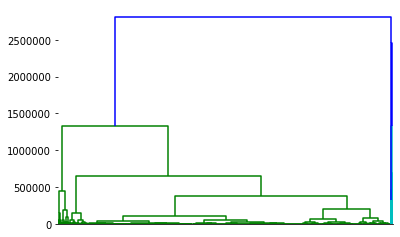

In [32]:
Z = linkage(np.c_[shares,shares], method ='ward', metric='euclidean')
cl = dendrogram(Z)
plt.xticks([]);

In [33]:
color = fcluster(Z, t=1500000, criterion='distance')

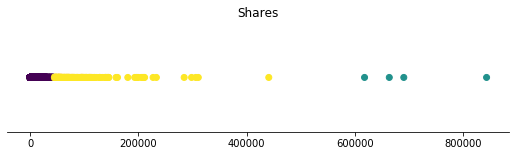

In [34]:
plt.figure(figsize=(9,2))
plt.scatter(shares, np.zeros(len(shares)), c=color)
plt.yticks([])
plt.title("Shares");

On attribue les classes à chaque observations.

In [37]:
y = np.c_[shares,color]

Et on retrouve les bornes suivantes : 

- de 0 à 43 700 partages 
- de 43 700 à 441 000 partages 
- plus de 441 000 partages

In [64]:
print(max((y[:,0][y[:,1] == 1])))
print(max((y[:,0][y[:,1] == 3])))

43700
441000


__Commentaire__ : 

### Arbre de régression 

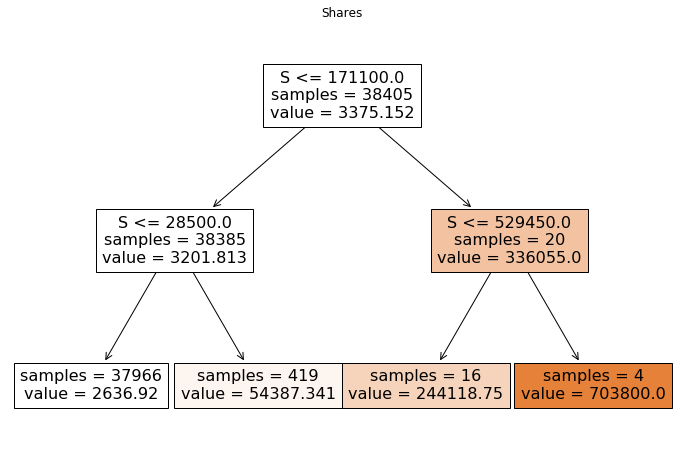

In [144]:
plt.figure(figsize=(12,8))
var = np.array(shares).reshape(-1,1)
tree = DecisionTreeRegressor(max_leaf_nodes=4)
tree.fit(var,var)
colors_tree = tree.apply(var)
plot_tree(tree,feature_names = "Shares", filled=True, impurity=False)
plt.title("Shares");
plt.savefig('rapport/img_projet/tree_tree.png');

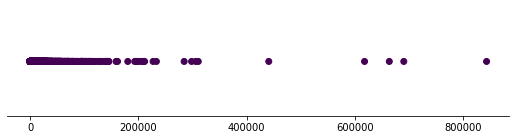

In [145]:
plt.figure(figsize=(9,2))
plt.scatter(shares, np.zeros(len(shares)), c=x)
plt.yticks([])
plt.savefig('rapport/img_projet/tree.png');

__Commentaire__ : l'arbre de régression propose un split binaire avec les article avec moins de 3200 partages (soit 38 385 articles) et ceux ayant plus de 3200 partages (soit 20 articles). Dans le cadre de notre modèle, ceci ferait qu'il existe un échantillon très déséquilibrée, mais qui semble bien refleter l'existence d'articles très populaire selon une métrique.

## Choix final et création de la variable discrétisée

In [139]:
final.to_csv('final_topics.csv')

## Références

http://eric.univ-lyon2.fr/~ricco/cours/slides/discretisation.pdf